Import libraries

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#% matplotlib inline

In [1]:
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

we need to retrieve and prepare data

In [13]:
df_train = pd.read_csv('datasets_897_1638_Sheet_2.csv', header=0, encoding = 'unicode_escape')

df_train.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


In [14]:
df_train['resume_text'][1]

'\rEngineer / Scientist - IBM Microelectronics Division\rWestford VT - Email me on Indeed: indeed.com/r/Albert-Gregoritsch/b105a8b2b40f9eca\rWORK EXPERIENCE\rEngineer / Scientist\rIBM Microelectronics Division - June 2007 to Present\rResponsible for Process and Equipment engineering for multiple lines including: o Multiple Bake processes\ro Leaded and lead free solder reflow\ro Thermal cycling\r\x8a\x97¢ Wrote specifications and procured capital for equipment purchases and upgrades \x8a\x97¢ Project management for equipment installation and equipment upgrades\r\x8a\x97¢ Developed methods for acquiring and tracking critical data metrics\r\x8a\x97¢ Drove production efficiency gains through data-driven decision making\r\x8a\x97¢ Implemented and maintained Lean Manufacturing initiatives o Root cause analysis and Structured Problem solving\ro Continuous Improvement activities\ro Standard Work and Job Breakdown Sheets\r\x8a\x97¢ Utilized statistical process controls on critical process indic

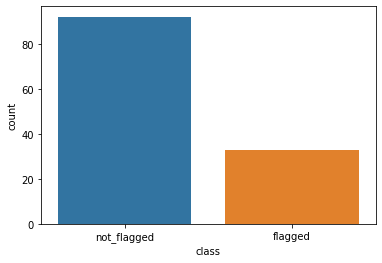

In [15]:
import seaborn as sns


sns.countplot(x='class', data=df_train)

we will preprocess our reviews and will store them in a new list as shown below

In [16]:
response_text = df_train['resume_text'].values

Next, we need to convert our labels into digits. Since we only have two labels in the output i.e.
"positive" and "negative". We can simply convert them into integers by replacing "positive" with 
digit 1 and negative with digit 0 as shown below:

In [23]:
y = df_train['class']

y = np.array(list(map(lambda x: 1 if x=="flagged" else 0, y)))

In [24]:
y

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0])

we need to divide our dataset into train and test sets.

We can use train_test_split method

In [25]:
sentences_train, sentences_test, y_train, y_test = train_test_split(response_text, y, test_size = 0.25,
                                                                   random_state = 1000)

Use Bag-of-words (BOW) model, which is a common way in NLP create vectors out of text. You can use the CountVectorizer. 

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

X_train

<93x9477 sparse matrix of type '<class 'numpy.int64'>'
	with 32044 stored elements in Compressed Sparse Row format>

The classification model we will use Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.6875


Deep Neural Networks 

In [28]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1] #Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim = input_dim, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


Compile() method. This method specifies the optimizer and the loss function.

In [29]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                94780     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 94,791
Trainable params: 94,791
Non-trainable params: 0
_________________________________________________________________


Fit() function

In [30]:
history = model.fit(X_train, y_train,
                   epochs = 100,
                   verbose = False,
                   validation_data = (X_test, y_test),
                   batch_size = 10)

Evaluate method. You can do this both for the training data and testing data

In [31]:
loss, accuracy = model.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 1.0000


In [32]:
loss, accuracy = model.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy: {:.4f}".format(accuracy))

Testing Accuracy: 0.7812


Visualize the loss and accuracy for the training and testing data based on the hystory call back

In [33]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss =history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc,  'b', label = 'Training acc')
    plt.plot(x, val_acc, 'r', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label = 'Training loss')
    plt.plot(x, val_loss, 'r', label = 'Validation loss')
    plt.title('Training and validation loss')
    
    plt.legend()
    

Call plot_hystory() with the collected accuracy and loss inside the hystory dictionary

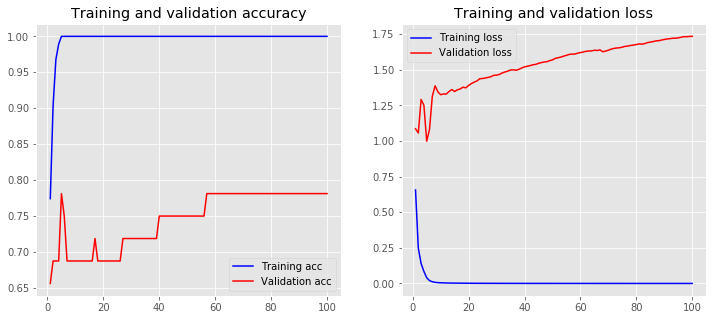

In [34]:
plot_history(history)